<ins><strong>Foundations of AI : Lab - 10 : Bayesian Networks</strong></ins>

<ins><strong>Name :</strong></ins> Gaurav Pendharkar

<ins><strong>Registration No.:</strong></ins> 20BAI1153

# Importing the required modules

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Making the graph

## Defining the graph

In [2]:
graph = {"3":["1","2"],"4":["3"],"5":["3"],"6":["4"],"7":["6"]}

## Visualisation of the graph

In [ ]:
G = nx.DiGraph()
G.add_nodes_from([str(i) for i in range(1,8)])

In [4]:
for child in graph:
    for parent in graph[child]:
        G.add_edge(parent,child)

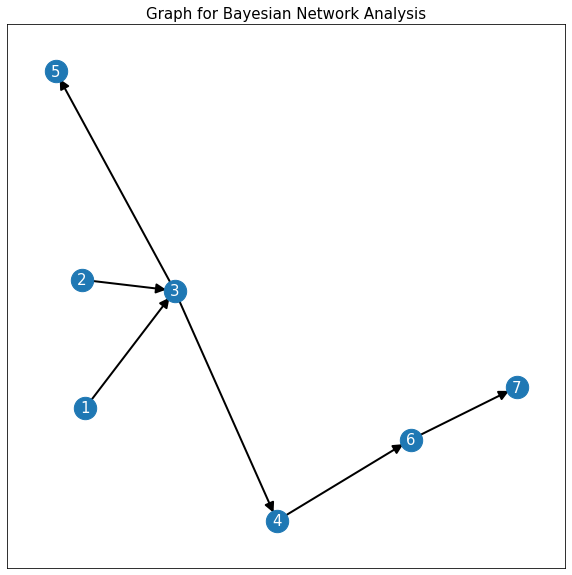

In [5]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos,node_size=500)
nx.draw_networkx_edges(G, pos=pos,arrows=True,width=2, 
arrowsize=20, arrowstyle='-|>')
nx.draw_networkx_labels(G, pos, font_size=15,font_color='w')
plt.title("Graph for Bayesian Network Analysis",font={"size":15})
plt.show()

# Finding dependencies in the graph

In [6]:
dependencies = dict()
for i in G.nodes():
   dependencies[i] = nx.ancestors(G, i)

In [7]:
dependencies

{'1': set(),
 '2': set(),
 '3': {'1', '2'},
 '4': {'1', '2', '3'},
 '5': {'1', '2', '3'},
 '6': {'1', '2', '3', '4'},
 '7': {'1', '2', '3', '4', '6'}}

# d-separation of the graph

## Networkx in-built syntax

In [13]:
nx.d_separated(G, {"1"}, {"2"}, {"4","6"})

False

# Without using built-in approach

## Finding the ancestrial graph

In [8]:
a = input("Enter the first variable")
b = input("Enter the second variable")
given = input("Enter the given variables").split(",")

Enter the first variable1
Enter the second variable2
Enter the given variables4,6


In [9]:
nodes = set([a,b]).union(given)
for i in given:
    nodes = nodes.union(dependencies[i])

In [10]:
ancestrial_graph = dict()
for i in graph:
    for j in graph[i]:
        if i in nodes and j in nodes:
            if i not in ancestrial_graph:
               ancestrial_graph[i] = [j]
            else:
               ancestrial_graph[i].append(j)

In [11]:
G = nx.DiGraph()
for child in ancestrial_graph:
    for parent in ancestrial_graph[child]:
        G.add_edge(parent,child)

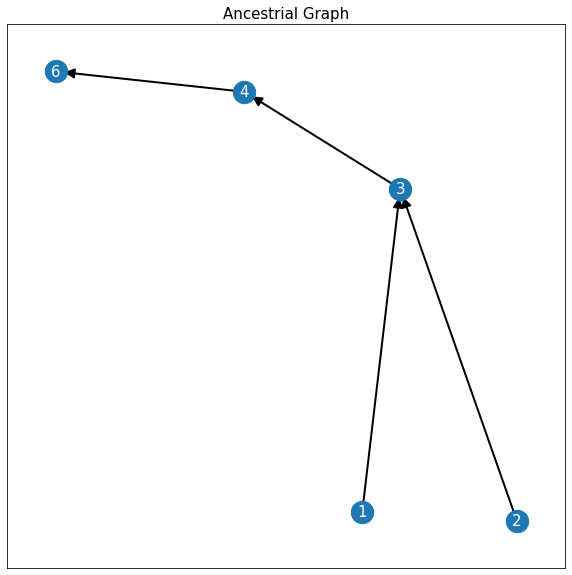

In [12]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos,node_size=500)
nx.draw_networkx_edges(G, pos=pos,arrows=True,width=2, 
arrowsize=20, arrowstyle='-|>')
nx.draw_networkx_labels(G, pos, font_size=15,font_color='w')
plt.title("Ancestrial Graph",font={"size":15})
plt.show()

## Moralize, Disorient and Delete

In [14]:
undirected = dict()

def moralize(graph):
  for i in graph:
    if len(graph[i]) >= 2:
       x = tuple(combinations(graph[i],2))
       for u in x:
           if u[0] not in undirected:
              undirected[u[0]] = [u[1]]
           else:
              undirected[u[0]].append(u[1])
                
def disorient(graph):
  global undirected
  undirected = undirected|graph
    
def delete(graph):
  g = []
  for i in graph:
      for j in graph[i]:
         if i not in given and j not in given:
              g.append((i,j))
  return g

In [15]:
moralize(ancestrial_graph)
disorient(ancestrial_graph)
final = delete(undirected)

In [16]:
final

[('1', '2'), ('3', '1'), ('3', '2')]

### Visualization of the result of d-separation

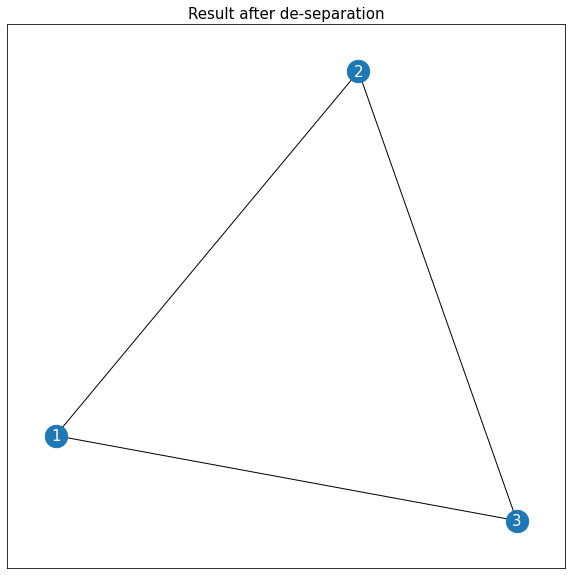

In [17]:
G = nx.Graph()
for i in final:
        G.add_edge(i[0],i[1])
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos,node_size=500)
nx.draw_networkx_edges(G, pos=pos)
nx.draw_networkx_labels(G, pos, font_size=15,font_color='w')
plt.title("Result after de-separation",font={"size":15})
plt.show()

## Conclusion from Bayesian Network Analysis

In [20]:
if (a,b) not in final and (b,a) not in final:
   print(a," and ",b," are conditionally independent.")
else:
   print(a," and ",b," are not conditionally independent because there exists an edge between them")

1  and  2  are not conditionally independent because there exists an edge between them
